<a href="https://colab.research.google.com/github/Kimhantag/Posco_AIBigdata_Academy25_edu/blob/main/4.CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Import libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---
# CNN for MNIST with Keras API

In [ ]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(type(x_trainval), x_trainval.shape)
print(type(y_trainval), y_trainval.shape)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size= 1/6, shuffle=True, stratify = y_trainval, random_state=34)
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'> (60000, 28, 28)
<class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (50000, 28, 28)
<class 'numpy.ndarray'> (50000,)


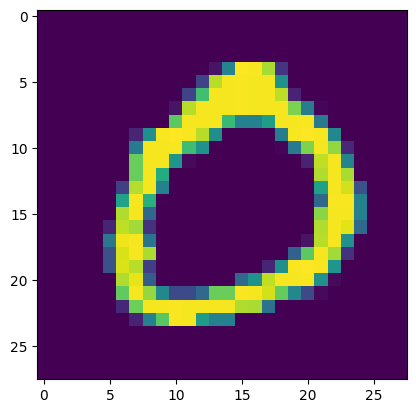

In [ ]:
plt.imshow(x_train[0])

In [ ]:
# Scale to [0, 1]
x_train, x_valid, x_test = x_train.astype('float32') / 255 , x_valid.astype('float32') / 255, x_test.astype('float32') / 255

# CNN need a dimension of channels
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(50000, 28, 28, 1) (10000, 28, 28, 1) (10000, 28, 28, 1)
(50000,) (10000,) (10000,)


In [ ]:
from tensorflow.keras import Model, layers

class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()  # CNN 클래스의 생성자에서 Model 클래스의 생성자를 호출합니다.
        # 첫 번째 합성곱 층을 정의합니다. 32개의 필터, 3x3 커널 크기, stride 1, same 패딩, ReLU 활성화 함수를 사용합니다.
        # input_shape은 모델의 첫 번째 레이어에서만 필요하며, 입력 데이터의 형태를 정의합니다.
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(28,28,1))
        # 첫 번째 맥스 풀링 층을 정의합니다. 3x3 풀링 크기, stride 2, same 패딩을 사용합니다.
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        # 두 번째 합성곱 층을 정의합니다. 이번에는 64개의 필터를 사용합니다.
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        # 두 번째 맥스 풀링 층을 정의합니다. 이번에도 3x3 풀링 크기와 stride 2를 사용합니다.
        self.maxpool2 = layers.MaxPool2D(3, strides=2)
        # 플래튼 층을 정의합니다. 이 층은 이전 층의 출력을 1차원 배열로 변환합니다.
        # fully connected layer는 1차원 데이터를 입력 받기 때문에 flatten 필요
        self.flatten = layers.Flatten()
        # 첫 번째 완전 연결(dense) 층을 정의합니다. 128개의 유닛과 ReLU 활성화 함수를 사용합니다.
        self.fc1 = layers.Dense(128, activation='relu')
        # 두 번째 완전 연결 층(출력 층)을 정의합니다. 분류할 클래스 수에 해당하는 10개의 유닛과 softmax 활성화 함수를 사용합니다.
        self.fc2 = layers.Dense(10, activation='softmax')

    def call(self, x):
        # 입력 데이터 x를 차례대로 각 레이어에 전달하고, 최종적으로 모델의 출력을 반환합니다.
        x = self.conv1(x)  # 첫 번째 합성곱 층을 통과시킵니다.
        x = self.maxpool1(x)  # 첫 번째 맥스 풀링 층을 통과시킵니다.
        x = self.conv2(x)  # 두 번째 합성곱 층을 통과시킵니다.
        x = self.maxpool2(x)  # 두 번째 맥스 풀링 층을 통과시킵니다.
        x = self.flatten(x)  # 플래튼 층을 통과시킵니다.
        x = self.fc1(x)  # 첫 번째 완전 연결 층을 통과시킵니다.
        x = self.fc2(x)  # 두 번째 완전 연결 층(출력 층)을 통과시킵니다.
        return x  # 최종 출력을 반환합니다.


In [ ]:
cnn.summary()
# 비슷하지만 다른 방법
# cnn = Sequential()
# cnn.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
# cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
# cnn.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
# cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
# cnn.add(layers.Flatten())
# cnn.add(layers.Dense(128, activation='relu'))
# cnn.add(layers.Dense(10, activation='softmax'))
# cnn.summary()
## Sequential([layer1, layer2, layer3, ....])

Model: "cnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2  multiple                  0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  295040

In [ ]:
cnn = CNN()

In [ ]:
# 모델을 컴파일하는 단계는 모델을 학습하기 전에 필요한 설정을 수행하는 과정입니다. 여기에는 손실 함수(loss function), 옵티마이저(optimizer), 그리고 평가 지표(metrics) 설정이 포함됩니다.
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), metrics = ['accuracy'])

In [ ]:
result = cnn.fit(x_train, y_train, epochs = 5, batch_size = 128, validation_data = (x_valid, y_valid))

Epoch 1/5
391/391 [==============================] - 6s 7ms/step - loss: 0.3972 - accuracy: 0.8736 - val_loss: 0.1015 - val_accuracy: 0.9699
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0830 - accuracy: 0.9741 - val_loss: 0.0681 - val_accuracy: 0.9789
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0587 - accuracy: 0.9823 - val_loss: 0.0662 - val_accuracy: 0.9796
Epoch 4/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0472 - accuracy: 0.9853 - val_loss: 0.0572 - val_accuracy: 0.9836
Epoch 5/5
391/391 [==============================] - 2s 5ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0448 - val_accuracy: 0.9862


In [ ]:
test_result = cnn.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0381 - accuracy: 0.9879
test loss:  0.038084883242845535
test acc:  0.9879000186920166


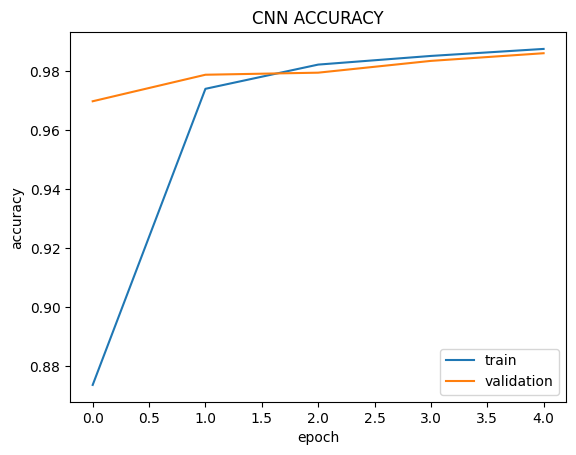

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('CNN ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

##Early_stopping & Model_checkpoint


In [ ]:
l1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(28,28,1))
l2 = layers.MaxPool2D(3, strides=2, padding='same')
l3 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
l4 = layers.MaxPool2D(3, strides=2, padding='same')
l5 = layers.Flatten()
l6 = layers.Dense(128, activation='relu')
l7 = layers.Dense(10, activation='softmax')

cnn = Sequential([l1, l2, l3, l4, l5, l6, l7])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               4

In [ ]:
cnn_early = Sequential([l1, l2, l3, l4, l5, l6, l7])

In [ ]:
# Early Stopping 설정: 모델이 과적합되는 것을 방지하기 위해 사용됩니다.
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # 모니터링할 지표. 검증 손실(val_loss)을 기준으로 합니다.
    mode='min',  # 'min' 모드는 'monitor' 지표를 최소화하는 지점을 찾습니다. val_loss를 감소시키는 것이 목표입니다.
    patience=4,  # 성능 향상이 관찰되지 않는 에폭의 수. 여기서는 4번의 에폭 동안 성능 향상이 없을 경우 학습을 중단합니다.
    verbose=1  # 얼리 스톱핑이 발생했을 때 콘솔에 메시지를 출력합니다. 1은 활성화를 의미합니다.
)

# Model Checkpoint 설정: 학습 중 모델의 가중치를 저장하는 데 사용됩니다.
mc = tf.keras.callbacks.ModelCheckpoint(
    './cnn',  # 모델 파일을 저장할 경로.
    monitor='accuracy',  # 모니터링할 지표. 여기서는 학습 정확도(accuracy)를 사용합니다.
    mode='max',  # 'max' 모드는 'monitor' 지표를 최대화하는 지점을 찾습니다. accuracy를 증가시키는 것이 목표입니다.
    save_best_only=True,  # True일 경우, 모니터링하는 지표가 개선되었을 때만 모델을 저장합니다.
    verbose=1  # 콜백이 모델을 저장할 때 메시지를 출력합니다. 1은 활성화를 의미합니다.
)

In [ ]:
cnn_early.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), metrics =['accuracy'])

In [ ]:
cnn_early.fit(
    x_train, y_train,  # x_train은 학습 데이터, y_train은 해당 데이터의 레이블입니다.
    epochs=20,  # 전체 학습 데이터 세트에 대한 학습 반복 횟수를 지정합니다. 여기서는 20번의 에폭 동안 학습합니다.
    batch_size=128,  # 한 번에 처리할 데이터 샘플의 수(1회 학습하는데 사용하는 데이터 수)를 지정합니다. 여기서는 128개의 샘플을 한 배치로 묶어 학습합니다.
    shuffle=True,  # 에폭마다 학습 데이터를 무작위로 섞어 과적합을 방지하는 데 도움이 됩니다.
    validation_data=(x_valid, y_valid),  # 학습 과정에서 모델의 성능을 평가하기 위한 검증 데이터 세트입니다.
                                          # x_valid는 검증 데이터, y_valid는 검증 데이터의 레이블입니다.
    callbacks = [es, mc]  # 앞서 정의한 Early Stopping(es)과 Model Checkpoint(mc) 콜백을 적용합니다.
                          # 이를 통해 학습 과정을 최적화하고, 과적합을 방지하며, 가장 성능이 좋은 모델을 저장합니다.
)

Epoch 1/20
387/391 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972
Epoch 1: accuracy improved from -inf to 0.99724, saving model to ./cnn
391/391 [==============================] - 4s 9ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 0.0347 - val_accuracy: 0.9908
Epoch 2/20
385/391 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9976
Epoch 2: accuracy improved from 0.99724 to 0.99754, saving model to ./cnn
391/391 [==============================] - 3s 7ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0410 - val_accuracy: 0.9892
Epoch 3/20
383/391 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9974
Epoch 3: accuracy did not improve from 0.99754
391/391 [==============================] - 2s 5ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0415 - val_accuracy: 0.9894
Epoch 4/20
383/391 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9979
Epoch 4: accuracy improved from

## Use a Model class

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(28,28,1))
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')


    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

In [ ]:
def train(net, x_train, y_train, x_valid, y_valid, x_test, y_test):
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    net.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

    result = net.fit(x_train, y_train, epochs = 15, batch_size = 128, validation_data = (x_valid, y_valid), verbose = 0)

    print('Test accuracy')

    test_result = net.evaluate(x_test, y_test)

    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('ACCURACY')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train','validation'], loc = 'best')

In [ ]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

Test accuracy
313/313 [==============================] - 2s 5ms/step - loss: 0.0541 - accuracy: 0.9832


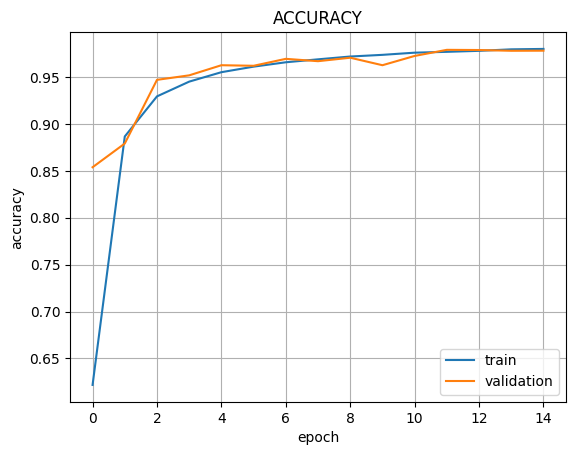

In [ ]:
cnn = CNN()
train(cnn, *data)

---
# CIFAR-10

In [ ]:
(x_trainval, y_trainval), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(type(x_trainval), x_trainval.shape)
print(type(y_trainval), y_trainval.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (50000, 1)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 1)


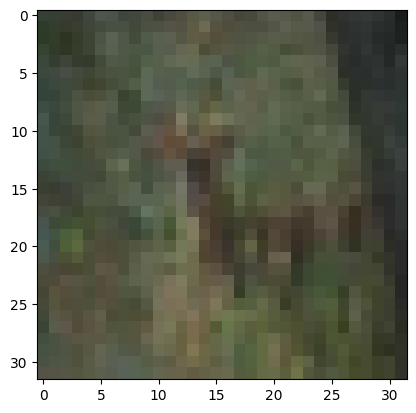

In [ ]:
plt.imshow(x_trainval[10])

In [ ]:
# Normalize to range 0 - 1
x_trainval = x_trainval.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Split train and validation dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, test_size= 1/6, shuffle=True, stratify = y_trainval, random_state=34)

In [ ]:
print(type(x_train), x_trainval.shape)
print(type(y_train), y_train.shape)
print(type(x_valid), x_valid.shape)
print(type(y_valid), y_valid.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (50000, 32, 32, 3)
<class 'numpy.ndarray'> (41666, 1)
<class 'numpy.ndarray'> (8334, 32, 32, 3)
<class 'numpy.ndarray'> (8334, 1)
<class 'numpy.ndarray'> (10000, 32, 32, 3)
<class 'numpy.ndarray'> (10000, 1)


In [ ]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

---
# CNN

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(32, 32, 3))
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same', activation='relu')
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')


    def call(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Test accuracy
313/313 [==============================] - 1s 3ms/step - loss: 1.1400 - accuracy: 0.6039


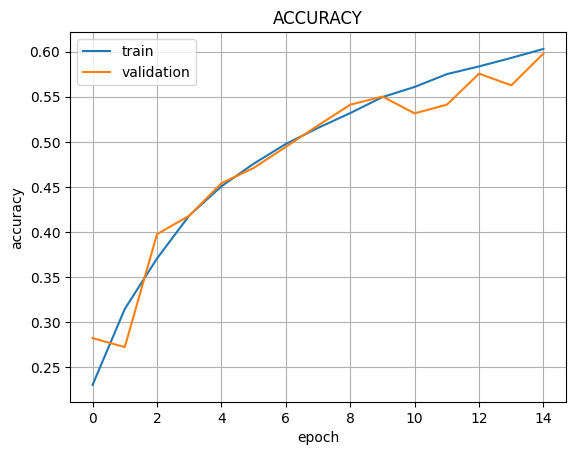

In [ ]:
cnn = CNN()
train(cnn, *data)

## Use batch normalization

In [ ]:
class CNN(Model):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = layers.Conv2D(32, 3, strides=1, padding='same', input_shape=(32,32,3))
        self.bn1 = layers.BatchNormalization()
        self.maxpool1 = layers.MaxPool2D(3, strides=2, padding='same')
        self.conv2 = layers.Conv2D(64, 3, strides=1, padding='same')
        self.bn2 = layers.BatchNormalization()
        self.maxpool2 = layers.MaxPool2D(3, strides=2, padding='same')
        self.flatten = layers.Flatten()
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(10, activation='softmax')
        self.relu = layers.ReLU()


    def call(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)

        return x

Test accuracy
313/313 [==============================] - 1s 4ms/step - loss: 0.8686 - accuracy: 0.7051


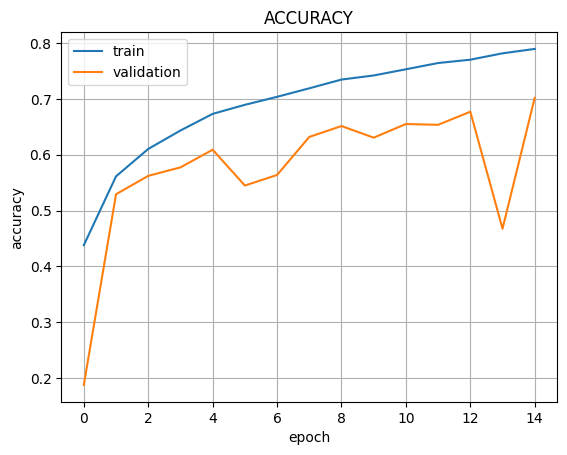

In [ ]:
cnn = CNN()
train(cnn, *data)